In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

stud_math = pd.read_csv('stud_math.csv')

In [2]:
display(stud_math.head(20))
stud_math.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
stud_math.columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
                     'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
                     'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                     'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
                     'freetime', 'goout', 'health', 'absences', 'score']

In [4]:
stud_math.Fedu[11] = 4  # заменяем некорректное значение
stud_math.famrel[25] = 1

<ipython-input-4-9bbde4a6a196>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud_math.Fedu[11] = 4  # заменяем некорректное значение
<ipython-input-4-9bbde4a6a196>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud_math.famrel[25] = 1


In [5]:
for i in stud_math[stud_math.columns[:-2]].select_dtypes(include=['object', 'float64']):
    display(stud_math[i].value_counts())
# кол-во уникальных значений не превышает 5

GP    349
MS     46
Name: school, dtype: int64

F    208
M    187
Name: sex, dtype: int64

U    295
R     83
Name: address, dtype: int64

GT3    261
LE3    107
Name: famsize, dtype: int64

T    314
A     36
Name: Pstatus, dtype: int64

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: Fedu, dtype: int64

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

mother    250
father     86
other      28
Name: guardian, dtype: int64

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

no     335
yes     51
Name: schoolsup, dtype: int64

yes    219
no     137
Name: famsup, dtype: int64

no     200
yes    155
Name: paid, dtype: int64

yes    195
no     186
Name: activities, dtype: int64

yes    300
no      79
Name: nursery, dtype: int64

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime_granular, dtype: int64

yes    356
no      19
Name: higher, dtype: int64

yes    305
no      56
Name: internet, dtype: int64

no     240
yes    124
Name: romantic, dtype: int64

4.0    182
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

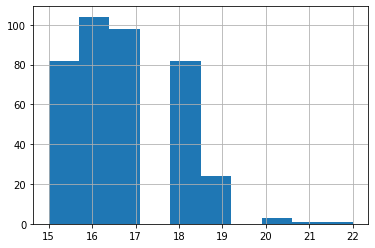

In [6]:
stud_math.age.hist()
stud_math.age.describe()
# большинство детей в возрасте 16-17 лет и очень мало 20-22 (опираясь на здравый смысл, выбросов нет)

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

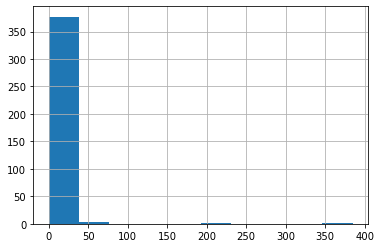

In [7]:
stud_math.absences.hist()  # обычно ученики мало пропускают занятия
stud_math.absences.describe()

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


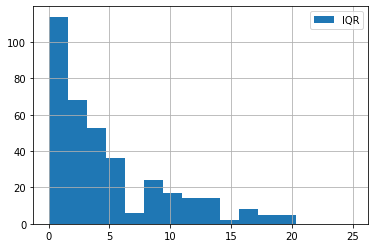

In [8]:
IQR = stud_math.absences.quantile(0.75) - stud_math.absences.quantile(0.25)
perc25 = stud_math.absences.quantile(0.25)
perc75 = stud_math.absences.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

stud_math.absences.loc[stud_math.absences.between(
    perc25 - 1.5*IQR,
    perc75 + 1.5*IQR)].hist(bins=16, range=(0, 25), label='IQR')

plt.legend()

In [9]:
stud_math = stud_math.loc[stud_math.absences <= 20]  # убираем выбросы

count    361.000000
mean      51.994460
std       22.956117
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

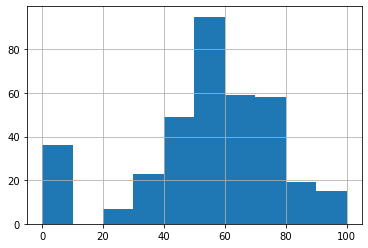

In [10]:
stud_math.score.hist()  # распределение относительно нормальное
stud_math.score.describe()

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


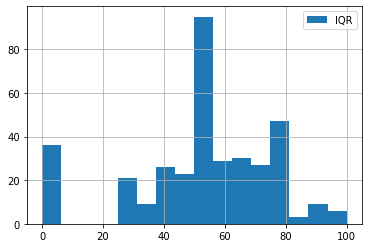

In [11]:
IQR = stud_math.score.quantile(0.75) - stud_math.score.quantile(0.25)
perc25 = stud_math.score.quantile(0.25)
perc75 = stud_math.score.quantile(0.75)

print(
    '25-й перцентиль: {},'.format(perc25),
    '75-й перцентиль: {},'.format(perc75),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

stud_math.score.loc[stud_math.score.between(
    perc25 - 1.5*IQR,
    perc75 + 1.5*IQR)].hist(bins=16, range=(0, 100), label='IQR')

plt.legend()  # выбросов нет

In [12]:
stud_math.corr()

,age,Medu,Fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.182463,-0.185368,0.085659,0.003035,0.195400,-0.003035,0.063204,0.058193,0.135466,-0.067958,0.151493,-0.159306
Medu,-0.182463,1.000000,0.629212,-0.197009,0.085532,-0.249754,-0.085532,-0.023323,0.027861,0.049094,-0.052316,0.065712,0.210257
Fedu,-0.185368,0.629212,1.000000,-0.145846,0.005116,-0.289421,-0.005116,-0.029874,-0.021205,0.029427,0.023932,-0.021811,0.113379
traveltime,0.085659,-0.197009,-0.145846,1.000000,-0.093825,0.085026,0.093825,-0.025343,-0.008602,0.031481,-0.006809,-0.047995,-0.074045
studytime,0.003035,0.085532,0.005116,-0.093825,1.000000,-0.174802,-1.000000,0.029926,-0.136510,-0.034197,-0.090552,-0.078099,0.113113
failures,0.195400,-0.249754,-0.289421,0.085026,-0.174802,1.000000,0.174802,0.009730,0.098642,0.085448,0.084991,0.081801,-0.329542
studytime_granular,-0.003035,-0.085532,-0.005116,0.093825,-1.000000,0.174802,1.000000,-0.029926,0.136510,0.034197,0.090552,0.078099,-0.113113
famrel,0.063204,-0.023323,-0.029874,-0.025343,0.029926,0.009730,-0.029926,1.000000,0.175624,0.092537,0.080079,-0.090500,0.061516
freetime,0.058193,0.027861,-0.021205,-0.008602,-0.136510,0.098642,0.136510,0.175624,1.000000,0.289474,0.038437,0.093436,0.034952
goout,0.135466,0.049094,0.029427,0.031481,-0.034197,0.085448,0.034197,0.092537,0.289474,1.000000,0.002320,0.111587,-0.122246


In [13]:
stud_math.drop(['studytime_granular'], inplace=True, axis=1)
# у столбцов studytime и studytime_granular корреляция -1, один из столбцов можно удалить

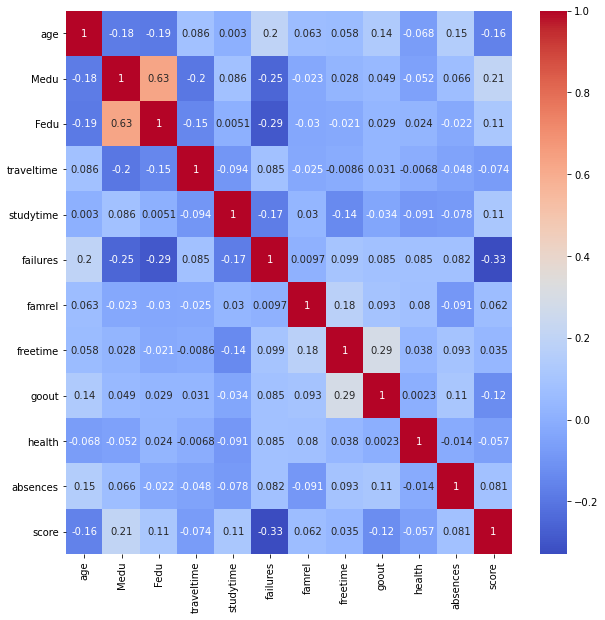

In [14]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(stud_math.corr(), annot=True, cmap='coolwarm', ax=ax)
# слабая отрицательная корреляция наблюдается со столбцом failures.
# также интересны столбцы age, studytime и goout (Medu и Fedu не рассматриваем т.к. они номинативные)

In [15]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=stud_math.loc[stud_math.loc[:, column].isin(
                    stud_math.loc[:, column].value_counts().index[:5])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

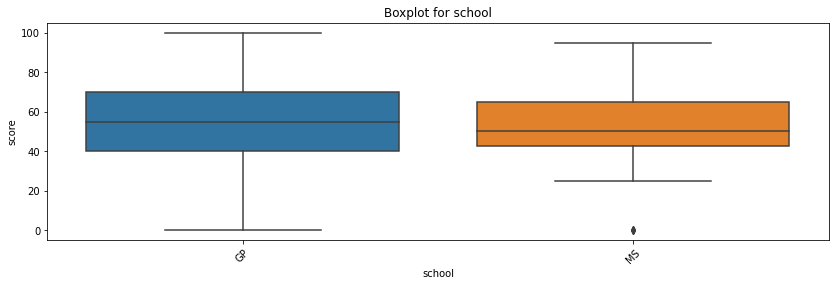

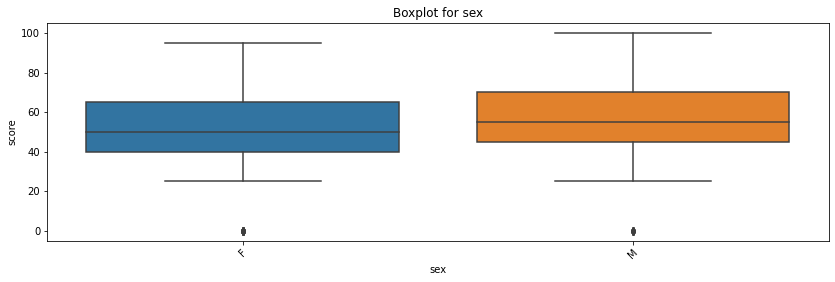

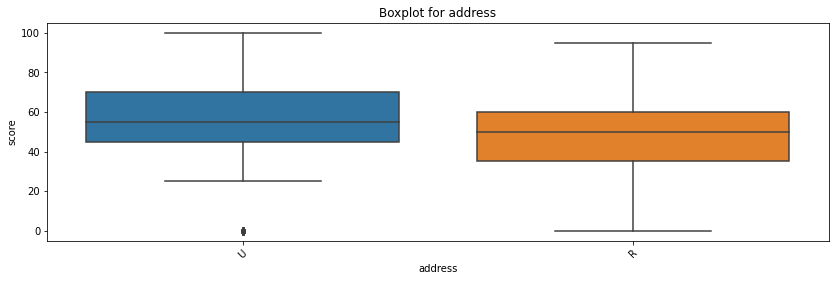

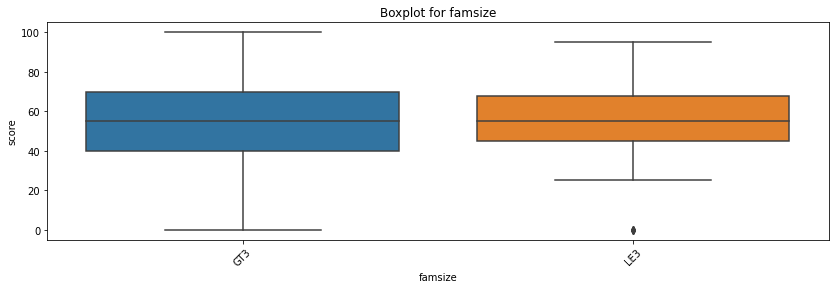

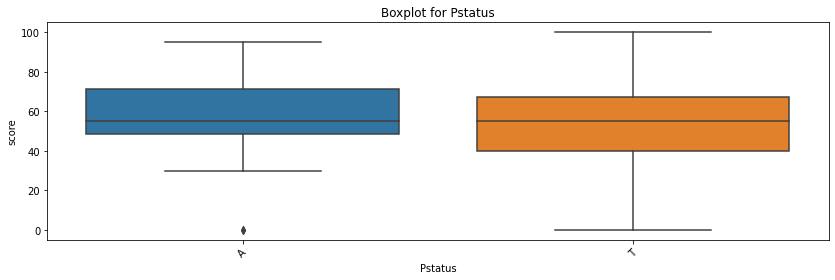

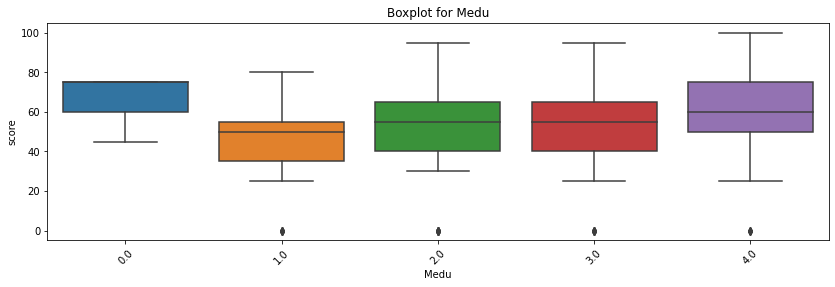

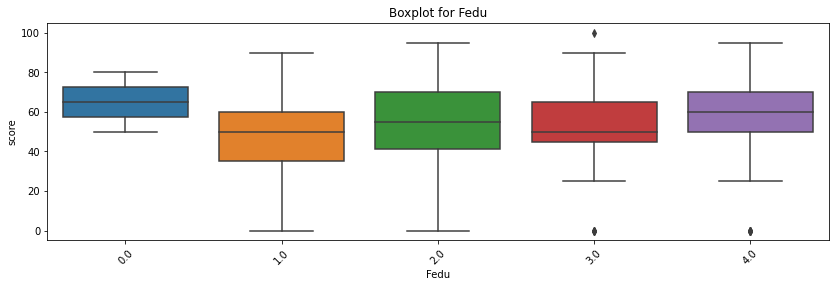

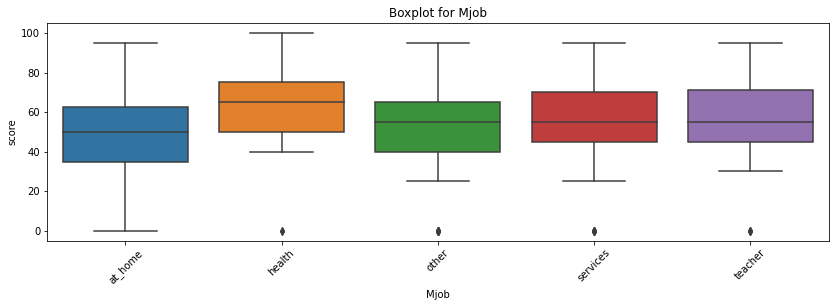

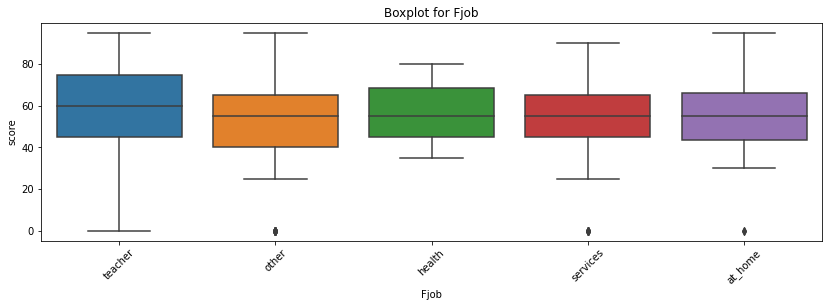

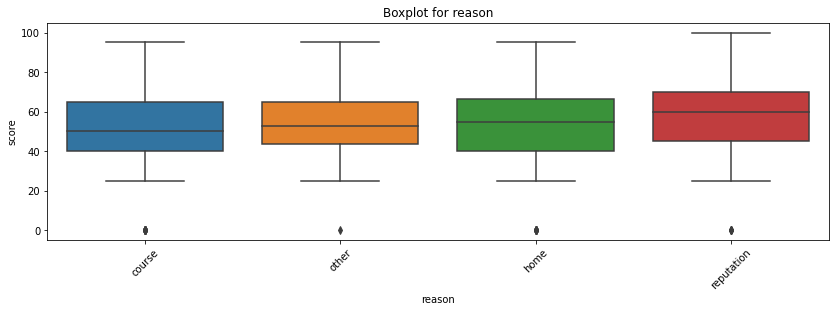

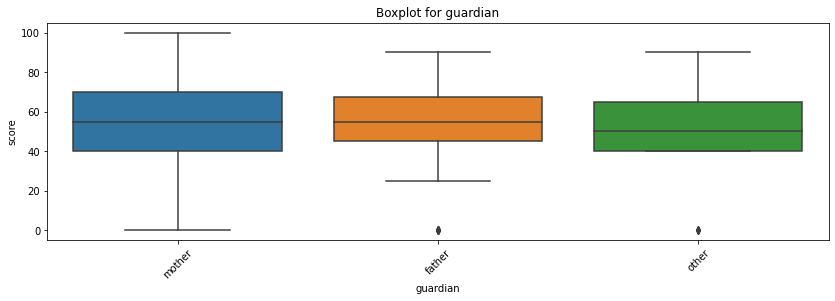

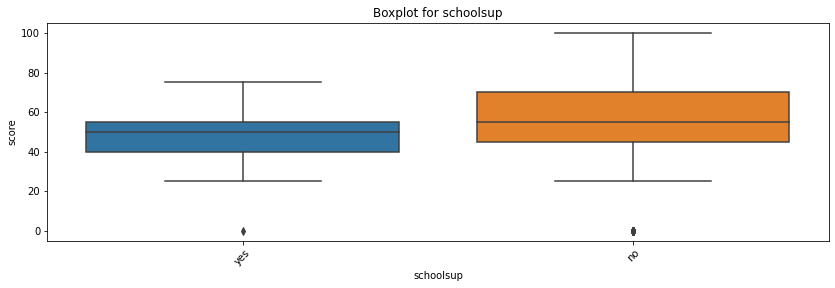

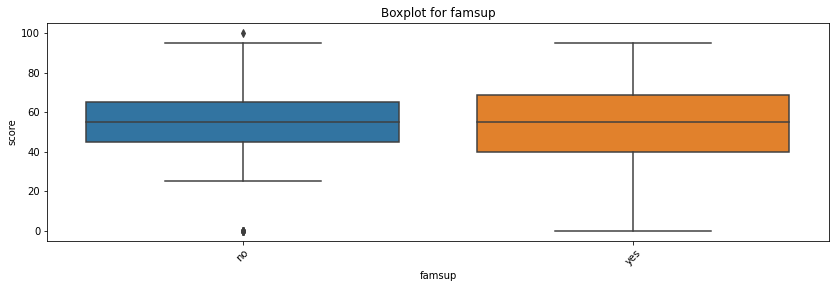

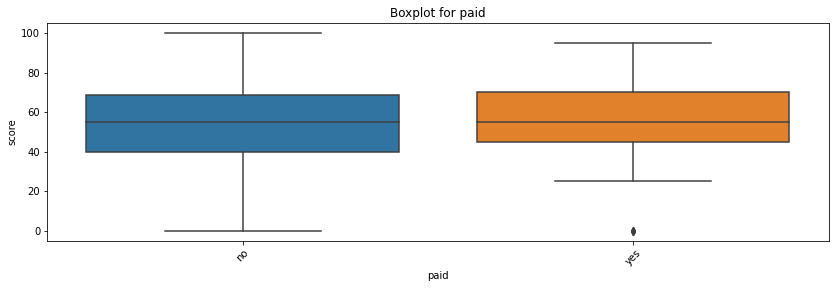

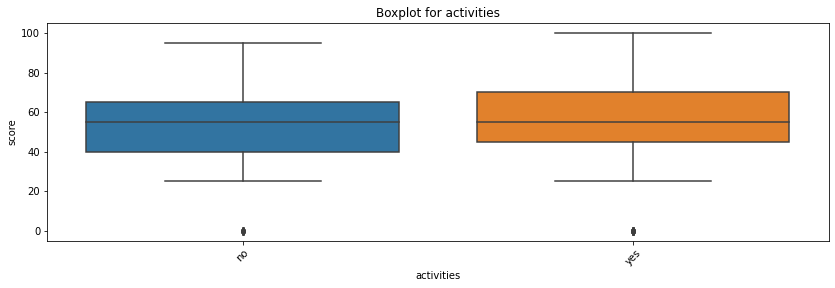

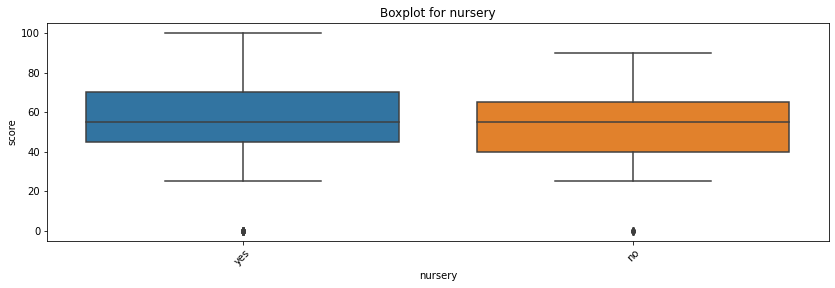

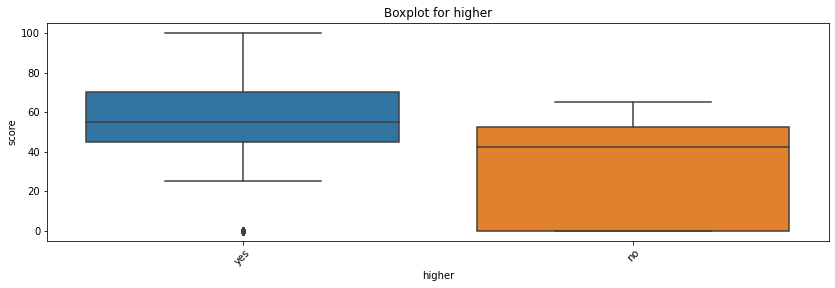

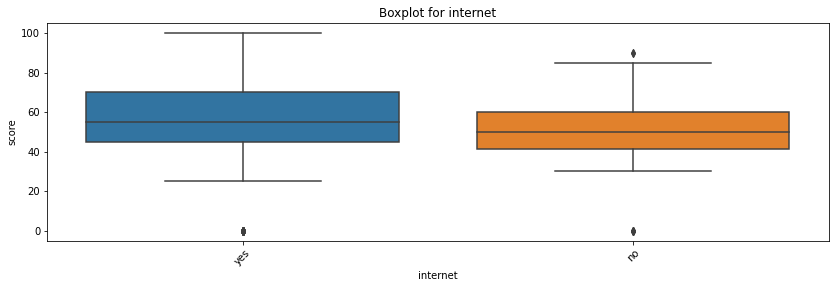

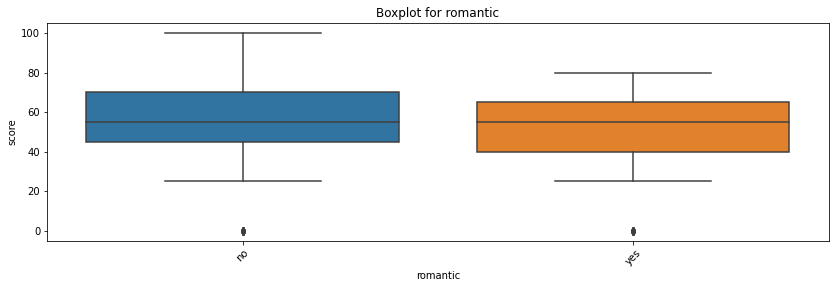

In [16]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
            'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)
# столбец higher положительно влияет на score

In [17]:
def get_stat_dif(column):
    cols = stud_math.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:, column] == comb[0], 'score'],
                     stud_math.loc[stud_math.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [18]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob',
            'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)
# серьезно отличается только параметр Mjob

Найдены статистически значимые различия для колонки Mjob


C:\Users\s1apa\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [19]:
stud_math_for_model = stud_math.loc[:, [
    'failures', 'age', 'studytime', 'goout', 'Mjob', 'higher']]
stud_math_for_model  # оставляем значимые столбцы

,failures,age,studytime,goout,Mjob,higher
0,0.0,18,2.0,4.0,at_home,yes
1,0.0,17,2.0,3.0,at_home,yes
2,3.0,15,2.0,2.0,at_home,yes
3,0.0,15,3.0,2.0,health,yes
4,0.0,16,2.0,2.0,other,yes
...,...,...,...,...,...,...
389,1.0,18,2.0,1.0,other,yes
391,0.0,17,1.0,5.0,services,yes
392,3.0,21,1.0,3.0,other,NaN
393,0.0,18,1.0,1.0,services,yes
